In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 8,8

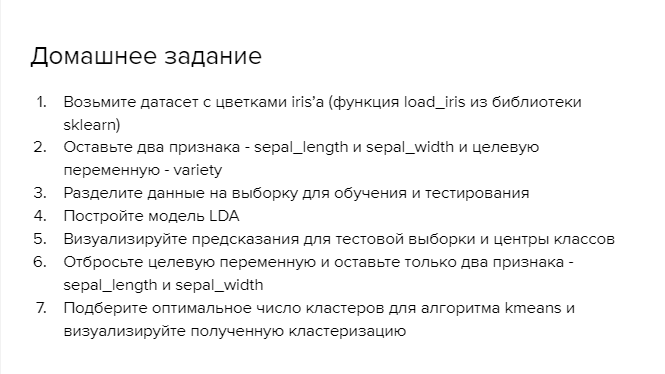

In [4]:
from IPython.display import Image
Image("hw_pic.png")

In [5]:
from sklearn.datasets import load_iris

In [6]:
iris = load_iris()

In [7]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
df = pd.DataFrame( iris.data , columns = iris.feature_names)
variety = iris.target

In [11]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


1. Дропнем столбцы с длиной лепестка:

In [12]:
df.drop([x for x in df.columns if 'petal' in x], axis = 1, inplace = True)
df.head(3)

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2


2. Разделим выборку на целевую и для тестирования

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df , variety , test_size=0.3)

In [14]:
print(f' Выборки \n \t Тренировочная имеет {X_train.count()[0]} значений, \n \t тестовая - {X_test.count()[0]} значений' )

 Выборки 
 	 Тренировочная имеет 105 значений, 
 	 тестовая - 45 значений


3. Построим модель Linear Discriminant Analysis (LDA)

In [15]:
lda = LinearDiscriminantAnalysis()

In [282]:
lda.fit(X_train , y_train)
y_pred = lda.predict(X_test)
accuracy_score(y_test, lda.predict(X_test))

0.8

Примерно 20% значений пропускаем или из 150 значений (длины матрицы Х признаков) значений 30 пропускаем.
Сравним с к-фолд

In [204]:
# Проведем k-fold на 10 выборках
from sklearn.model_selection import cross_val_score

lda_2 = LinearDiscriminantAnalysis()
X_raw = np.array(df)
y = variety

Accuracy_array = cross_val_score(lda_2, X_raw, y, cv = 10, scoring='accuracy')
#Printing all 10 accuracy scores
print(f'Массив точности из 10 выборок = \n{Accuracy_array}')
print(f'Среднее значение массива точности из 10 выборок = {Accuracy_array.mean()}')

Массив точности из 10 выборок = 
[0.66666667 0.8        0.86666667 0.86666667 0.8        0.66666667
 0.93333333 0.73333333 0.86666667 0.86666667]
Среднее значение массива точности из 10 выборок = 0.8066666666666669


Точность в нашей выборке из 75% тренировочных и 25% тестовых  = 0.8    
Средняя точность в 10 выборках = 0.807.   
Можно сказать что размер тестовой выборки не повлял на точность модели.    

In [17]:
# коэффициенты дискриминантной функции (или пороговой функции)
lda.coef_

array([[-5.79826798,  8.03246604],
       [ 1.49064507, -3.44462524],
       [ 4.09936826, -4.2599239 ]])

### По коэффициентам можно сказать, что 
- 'Класс 0' имеет высокие коэффициенты по обоим признакам ( -5 и 8) - стало быть, определенность к 'классу 0' оказывают признаки 'sepal width' (Х1) и 'sepal length' (X2),
- 'Класс 2' имеет сравнительно высокие коэффициенты по обоим признакам ( 4 и -4) - важное значение для включения  в 'класс 2' оказывают признаки 'sepal width' (Х1) и 'sepal length' (X2),
- 'Класс 1' имеет слабо выраженные коэффициенты по обоим признакам ( 1 и -3) - невыское значение для включения  в 'класс 1' оказывают признаки 'sepal width' (Х1) и 'sepal length' (X2),

In [100]:
# Центры кластеров:
lda.means_

array([[5.01764706, 3.46176471],
       [5.89444444, 2.78611111],
       [6.51714286, 2.93428571]])

### Логистическая регрессия

In [279]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train , y_train)
lr_y_pred = lr.predict(X_test)
accuracy_score(y_test, lr_y_pred)

0.8222222222222222

Точность получше, чем у дискриминантной функции, но все же не 90%.   
Что еще можно сделать.

In [298]:
changable_val = {'l1_ratio': [0, 0.1, 0.2, 0.3, 0.5,0.7,0.9,1]}
lr_2 = GridSearchCV(LogisticRegression(penalty='elasticnet',solver='saga',tol=0.0001, max_iter=1000), changable_val, scoring = 'accuracy', cv = 10 )
lr_2.fit(X_raw,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=1000, penalty='elasticnet',
                                          solver='saga'),
             param_grid={'l1_ratio': [0, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 1]},
             scoring='accuracy')

In [299]:
lr_2.best_params_

{'l1_ratio': 0.9}

In [300]:
lr_2.best_score_

0.8266666666666668

In [301]:
lr2_y_pred = lr_2.predict(X_test)

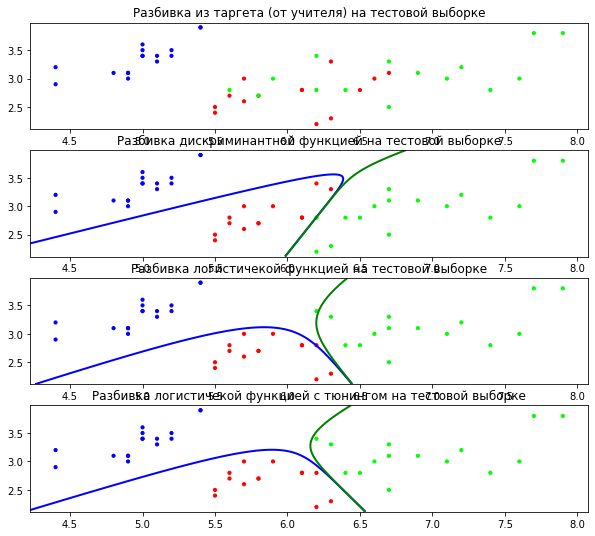

In [308]:
rcParams['figure.figsize'] = 10,9
figure, plots = plt.subplots(4, 1)
X_test_array = np.array(X_test)

plots[0].scatter(X_test_array[:,0], X_test_array[:,1] ,cmap='brg', c=y_test, s=10)
plots[0].set_title('Разбивка из таргета (от учителя) на тестовой выборке')

plots[1].scatter(X_test_array[:,0], X_test_array[:,1] ,cmap='brg', c=y_pred, s=10)
plots[1].set_title('Разбивка дискриминантной функцией на тестовой выборке')

plots[2].scatter(X_test_array[:,0], X_test_array[:,1] ,cmap='brg', c=lr_y_pred, s=10)
plots[2].set_title('Разбивка логистичекой функцией на тестовой выборке')

plots[3].scatter(X_test_array[:,0], X_test_array[:,1] ,cmap='brg', c=lr2_y_pred, s=10)
plots[3].set_title('Разбивка логистичекой функцией с тюнингом на тестовой выборке')

#Создаем сетку 200х100
nx = 200
ny = 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
lx = np.linspace(x_min,x_max,nx)
ly = np.linspace(y_min,y_max,ny)
xx, yy = np.meshgrid(lx,ly)

for i,val in [(1,lda),(2,lr),(3,lr_2)]:
    # Делаем расчет вероятности нахождения каждой точки в классе классе
    z = val.predict_proba( np.c_[xx.ravel(),yy.ravel()] )
    z1 = z[:,1].reshape(xx.shape)
    z2 = z[:,2].reshape(xx.shape)

    # Рисуем линию
    plots[i].contour(xx, yy, z1, [0.5], linewidths=2., colors='blue')
    plots[i].contour(xx, yy, z2, [0.5], linewidths=2., colors='green')

Видно, что есть неточности в разбивках.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


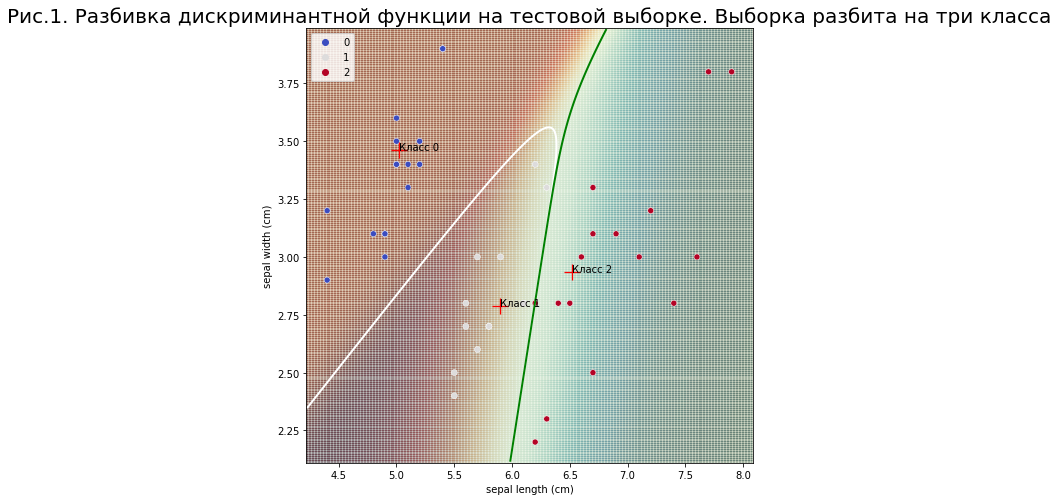

In [236]:
sns.scatterplot(x = X_test.columns[0], y = X_test.columns[1] , data = X_test, hue = y_pred,  palette="coolwarm")
sns.scatterplot(lda.means_[:, 0] , lda.means_[:, 1], color = 'r', s = 250, marker = '+' )

plt.title(f'Рис.1. Разбивка дискриминантной функции на тестовой выборке. Выборка разбита на три класса',fontsize = 20)

for i,class_no in [(0,'Класс 0'),(1,'Класс 1'),(2,'Класс 2') ]:
    plt.text(lda.means_[i, :][0],lda.means_[i, :][1], class_no)


#Создаем сетку 300х200
nx = 300
ny = 200
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
lx = np.linspace(x_min,x_max,nx)
ly = np.linspace(y_min,y_max,ny)
xx, yy = np.meshgrid(lx,ly)

# Делаем расчет вероятности нахождения каждой точки в классе классе
z = lda.predict_proba( np.c_[xx.ravel(),yy.ravel()] )
z1 = z[:,1].reshape(xx.shape)
z2 = z[:,2].reshape(xx.shape)

# Рисуем сетку
plt.pcolormesh(xx,yy,z1, cmap = 'summer_r',alpha = 0.2, shading = 'auto', zorder=-1)
plt.pcolormesh(xx,yy,z2, cmap = 'RdBu',alpha = 0.2, shading = 'auto', zorder=-1)

# Рисуем линию
plt.contour(xx, yy, z1, [0.5], linewidths=2., colors='white')
plt.contour(xx, yy, z2, [0.5], linewidths=2., colors='green')

### Вывод по 'рис.1 Проверка дискриминантной функции на тестовой выборке.':
- Элементы класса 2 (красные точки) попадают в область класса 1 (белые точки), что говорит о большой погрешности
- решающее правило для класса 0 подобрано корректно

# Определим кластеры, не имея данных о классах.   Классификация без учителя.

In [101]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

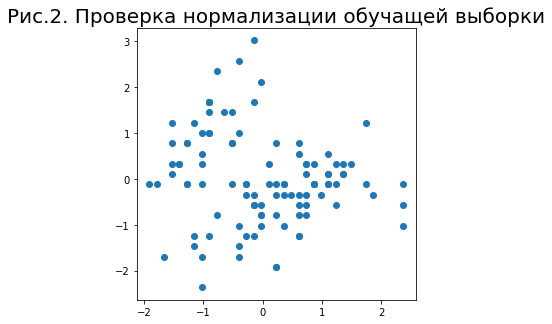

In [141]:
plt.figure(figsize=(5,5))
plt.title(f'Рис.2. Проверка нормализации обучащей выборки',fontsize = 20)
plt.scatter(X_scaled[:, 0],X_scaled[:, 1], cmap="coolwarm")

In [ ]:
from sklearn.cluster import KMeans

In [137]:
# указываем количество кластеров 2
kmeans = KMeans(n_clusters = 2)

# подбираем весовые коэффициенты параметров на обучающей выборке
clusters = kmeans.fit(X_scaled)

In [206]:
# определяем кластеры
# применяем для тестовой выборки весовые коэффициенты и биас, полученные в обучающей выборке - получаем кластеры:
X_test_scaled = scaler.fit_transform(X_test)

clusters_test = kmeans.predict(X_test_scaled)
clusters_test

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0])

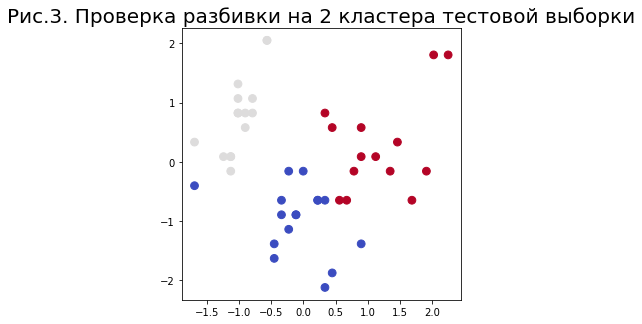

In [309]:
plt.figure(figsize=(5,5))
plt.title(f'Рис.3. Проверка разбивки на 2 кластера тестовой выборки',fontsize = 20)
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], cmap='coolwarm', c = clusters_test, s=60)

Разбивка на 2 кластера прошла корректно

## Определяем количество кластеров:

In [148]:
# строим график локтя

# создаем список для инерции
k_inertia = []
ks = range(1, 20)

# создаем массив из всех признаков Х1 и Х2. Нормализируем его. 
X = scaler.fit_transform( np.array(df) )

for k in ks:
    clf_kmeans = KMeans( n_clusters = k )
    clusters_array = clf_kmeans.fit_predict( X )
    k_inertia.append( clf_kmeans.inertia_ )

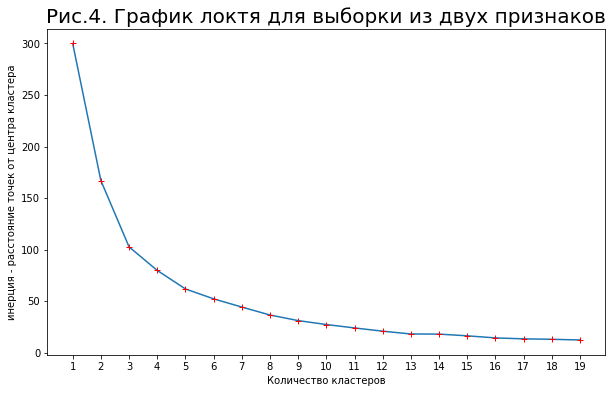

In [153]:
plt.figure(figsize=(10,6))
plt.title('Рис.4. График локтя для выборки из двух признаков', fontsize = 20)
plt.plot(ks, k_inertia)
plt.xticks(ks)
plt.xlabel('Количество кластеров')
plt.ylabel('инерция - расстояние точек от центра кластера')
plt.plot(ks, k_inertia ,'+', color = 'red')

### Вывод по 'рис.4. График локтя для выборки из двух признаков':
После количества кластеров = 3 - 5 инерция перестае значительно меняться.  
Скорее всего, количетво классов 3.

In [207]:
# указываем количество кластеров 3
kmeans = KMeans(n_clusters = 3)

# подбираем весовые коэффициенты параметров на обучающей выборке
clusters_kmeans = kmeans.fit(X_scaled)

In [310]:
# применяем для тестовой выборки весовые коэффициенты и биас, полученные в обучающей выборке - получаем кластера:
clusters_test = kmeans.predict(X_test_scaled)
clusters_test

array([1, 0, 1, 2, 0, 2, 1, 2, 1, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 0, 2, 1,
       1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 1, 1, 1, 2, 0, 2, 1, 2, 1, 2, 1, 0,
       1])

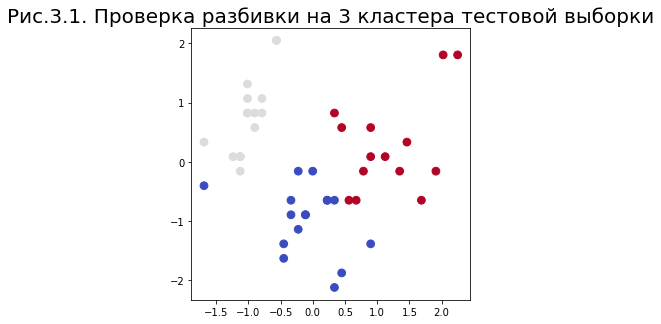

In [311]:
plt.figure(figsize=(5,5))
plt.title(f'Рис.3.1. Проверка разбивки на 3 кластера тестовой выборки',fontsize = 20)
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], cmap='coolwarm', c = clusters_test, s=60)

### Построим дендрограмму кластеров

In [154]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

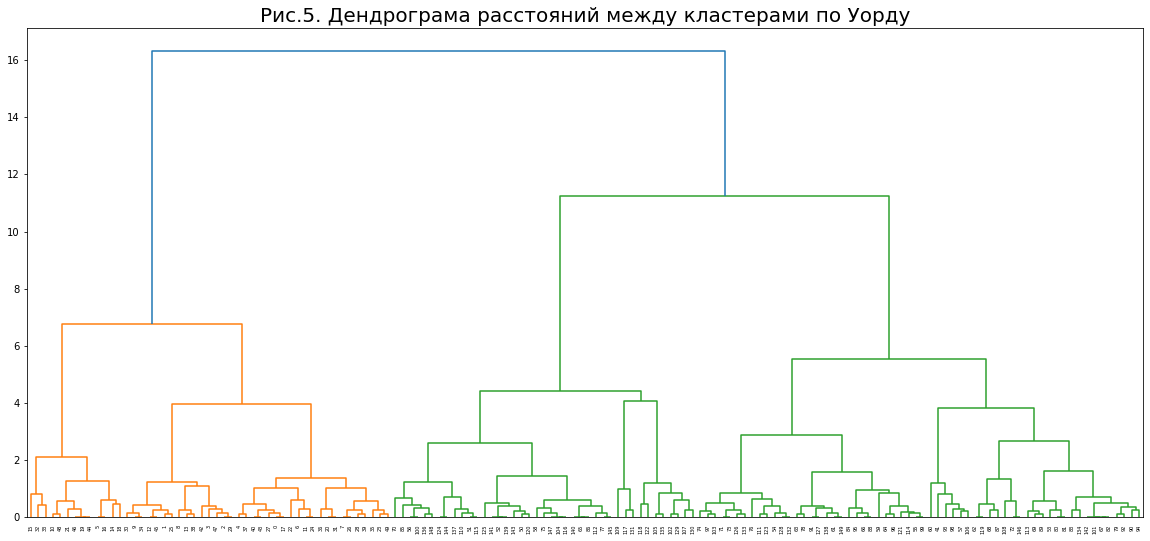

In [157]:
# строим дендрограмму
distance_mat = pdist(X) # pdist посчитает нам матрицу попарных расстояний между точками
# Z = hierarchy.linkage(distance_mat) # linkage — реализация агломеративного алгоритма
Z = hierarchy.linkage(distance_mat, 'ward')
plt.figure(figsize=(20, 9))
plt.title('Рис.5. Дендрограма расстояний между кластерами по Уорду', fontsize = 20)
dn = hierarchy.dendrogram(Z)

### По 'Рис.5. Дендрограма расстояний между кластерами по Уорду' :
- на расстоянии между узлами = 9 можно разбить на 3 класса,
- на расстоянии между узлами = 4 можно разбить на 5 классов 

Text(0.5, 1.0, 'Рис.6. Дендрограма расстояний между кластерами по "ближнему соседу"')

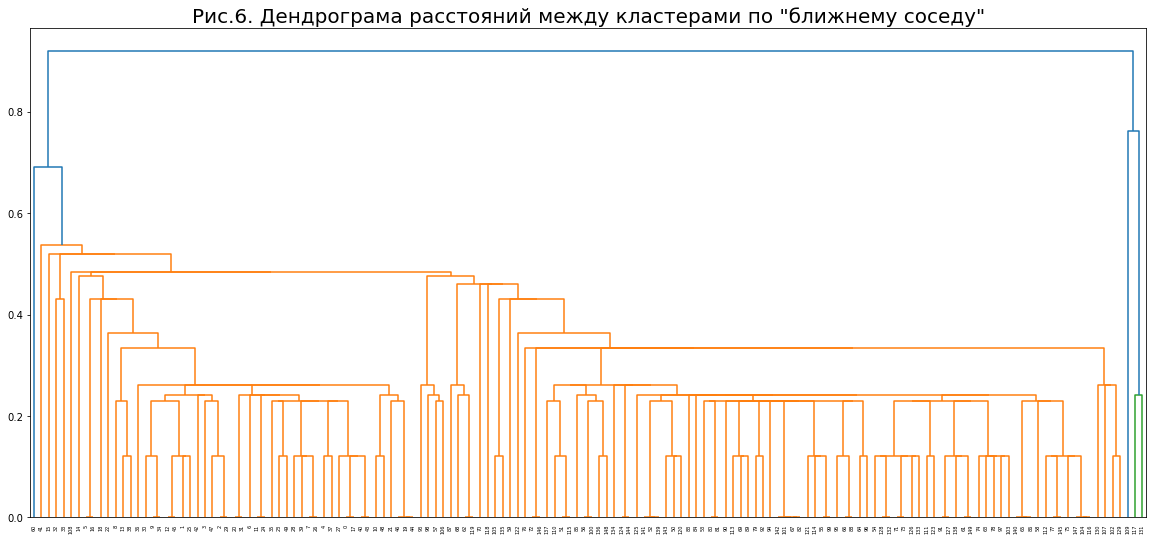

In [160]:
# строим дендрограмму
distance_mat = pdist(X) # pdist посчитает нам матрицу попарных расстояний между точками
Z = hierarchy.linkage(distance_mat, 'single')
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z)
plt.title('Рис.6. Дендрограма расстояний между кластерами по "ближнему соседу"', fontsize = 20)

In [161]:
# делаем уже кластеризацию по факту
from sklearn.cluster import AgglomerativeClustering

In [175]:
aglo = AgglomerativeClustering(n_clusters = 3)
clusters_aglo = aglo.fit_predict(X)
clusters_aglo

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int64)

In [182]:
aglo.affinity

'euclidean'

Text(0, 0.5, 'sepal length (cm) normalazed ')

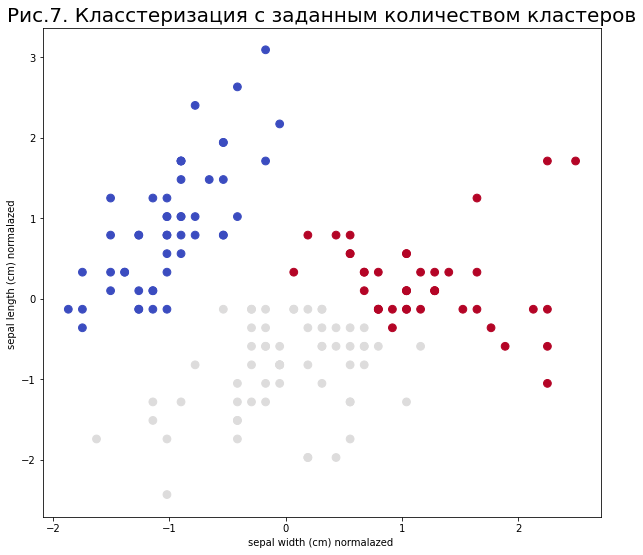

In [312]:

plt.scatter(X[:, 0], X[:, 1],cmap='coolwarm', c = clusters_aglo, s=60)
plt.title('Рис.7. Класстеризация с заданным количеством кластеров', fontsize = 20)
plt.xlabel(df.columns[1] + ' normalazed ')
plt.ylabel(df.columns[0] + ' normalazed ')

Text(0.5, 1.0, 'Схема 4. Разбивка логистической функцией на тестовой выборке')

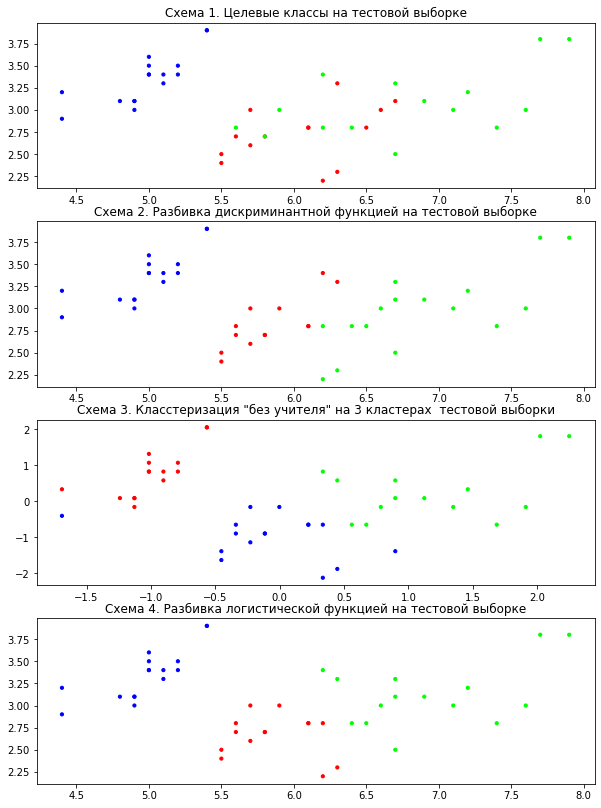

In [313]:
rcParams['figure.figsize'] = 10,14
figure, plots = plt.subplots(4, 1)


plots[0].scatter(X_test_array[:,0], X_test_array[:,1] ,cmap='brg', c=y_test, s=10)
plots[0].set_title('Схема 1. Целевые классы на тестовой выборке')

plots[1].scatter(X_test_array[:,0], X_test_array[:,1] ,cmap='brg', c=y_pred, s=10)
plots[1].set_title('Схема 2. Разбивка дискриминантной функцией на тестовой выборке')

plots[2].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], cmap='brg', c = clusters_test, s=10)
plots[2].set_title(f'Схема 3. Класстеризация "без учителя" на 3 кластерах  тестовой выборки')

plots[3].scatter(X_test_array[:,0], X_test_array[:,1] ,cmap='brg', c=lr2_y_pred, s=10)
plots[3].set_title('Схема 4. Разбивка логистической функцией на тестовой выборке')

### Вывод: 
- ни одна из кластеризаций (Схема 2 - 4) не соответствуют истинным классам (Схема 1)
- дискриминантная функция судя по всему должна быть не линейная
- из исходной матрицы из 4 плоскостей были выкинуты две плоскости, что искажает классификацию - необходимо применять снижение размерности данных (Метод главных компонент или Principal Component Analysis  ) 